In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Housing.csv")


In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# EDA

In [8]:
data.shape
# so it has totally 1168 rows and 81 columns 
#the Sale price column is continous so it is regression problem

(1168, 81)

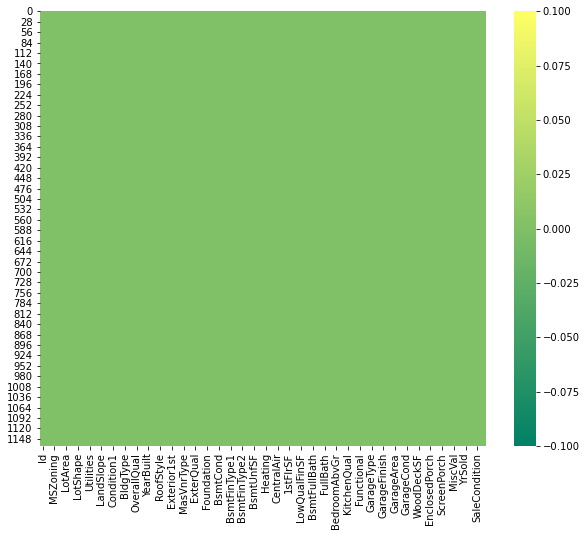

In [57]:
# finding out null values 
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull(),cmap='summer')
    
    

In [ ]:
# Replacing all the null values from the data and dropping unecessary coulumns which are empty

In [6]:
data['MSZoning']=data['MSZoning'].replace(np.NaN,'RL')

In [8]:
data=data.drop(columns=['FireplaceQu'])

In [13]:
data=data.drop(columns=['Fence'])

In [16]:
data=data.drop(columns=["PoolArea"])

In [19]:
data=data.drop(columns=['Alley'])

In [18]:
data=data.drop(columns=['PoolQC'])

In [9]:
data['MiscFeature']=data['MiscFeature'].replace(np.NaN,'Shed')

In [10]:
data['GarageQual']=data['GarageQual'].replace(np.NaN,"TA")

In [11]:
data['GarageCond']=data['GarageCond'].replace(np.NaN,"TA")

In [55]:
data['MasVnrArea']=data['MasVnrArea'].replace(np.NaN,'102')

In [26]:
data['GarageType']=data['GarageType'].replace(np.NaN,'Attchd')

In [28]:
data['GarageFinish']=data['GarageFinish'].replace(np.NaN,'Unf')

In [31]:
data['GarageYrBlt']=data['GarageYrBlt'].replace(np.NaN,'2006')

In [34]:
data['LotFrontage']=data['LotFrontage'].replace(np.NaN,'70')

In [37]:
data['BsmtQual']=data['BsmtQual'].replace(np.NaN,'TA')

In [40]:
data['BsmtCond']=data['BsmtCond'].replace(np.NaN,'TA')

In [43]:
data['BsmtExposure']=data['BsmtExposure'].replace(np.NaN,'No')

In [46]:
data['BsmtFinType1']=data['BsmtFinType1'].replace(np.NaN,'Unf')

In [48]:
data['BsmtFinType2']=data['BsmtFinType2'].replace(np.NaN,'Unf')

In [52]:
data['MasVnrType']=data['MasVnrType'].replace(np.NaN,'None')

In [60]:
# this is the new shape after replacing and removing the data 
house=data
house.shape

(1168, 76)

In [61]:
#statiscs
house.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,10484.749144,6.104452,5.595890,1970.930651,1984.758562,444.726027,46.647260,569.721747,...,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,8957.442311,1.390153,1.124343,30.145255,20.785185,462.664785,163.520016,449.375525,...,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,216.000000,...,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,385.500000,0.000000,474.000000,...,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,714.500000,0.000000,816.000000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
# there are definetly outliers present in the data cause columns of most of them have more max value than 75%
#the std is also so we need to remove the skewness


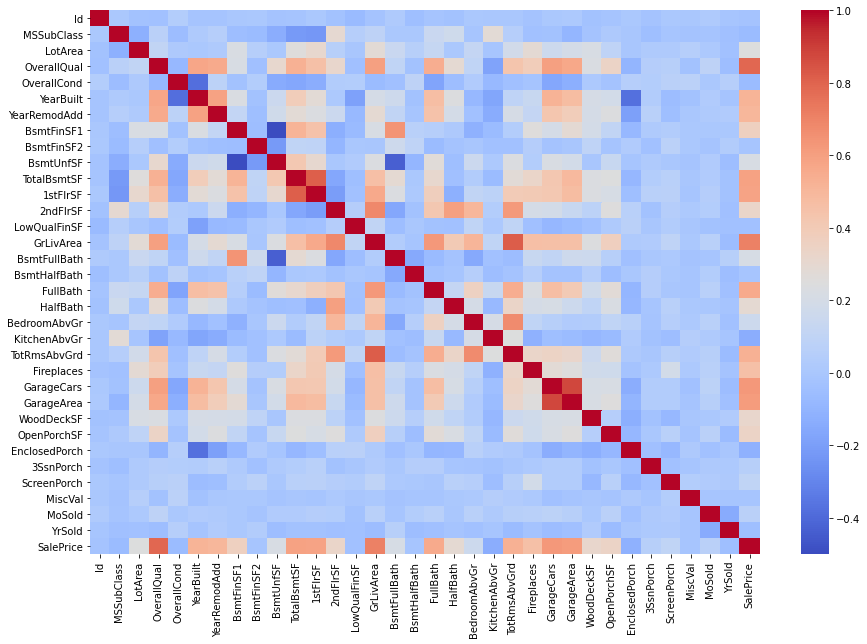

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(data=house.corr(),cmap='coolwarm')

In [64]:
#from the co-relation map we can observe which coulumns are highly co-related with sales Price
**************
#Here N=Numerical,c=Categorical
#Lot Area- N  
#OverallQual-C
#YearBuilt-C
#YearRemodAdd-C
#BsmtFinType1-C
#BsmtUnfSF-N
#TotalBsmtSF-N
#1stFlrSF-N
#2ndFlrSF-N
#GrLivArea-N
#BsmtFullBath-N
#FullBath-N
#Half Bath-N
#TotRmsAbvGrd-N
#Fireplaces-N
#GarageCars-N
#GarageArea-N
#WoodDeckSF-N
#OpenPorchSF-N
***************

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,2,2007,WD,Normal,128000
1,889,20,RL,95,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,Shed,0,10,2007,WD,Normal,268000
2,793,60,RL,92,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,Shed,0,6,2007,WD,Normal,269790
3,110,20,RL,105,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,1,2010,COD,Normal,190000
4,422,20,RL,70,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,Shed,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,70,9819,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,2,2010,WD,Normal,122000
1164,554,20,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,Shed,0,5,2009,WD,Normal,108000
1165,196,160,RL,24,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,Shed,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50,8500,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,Shed,0,7,2008,WD,Normal,40000


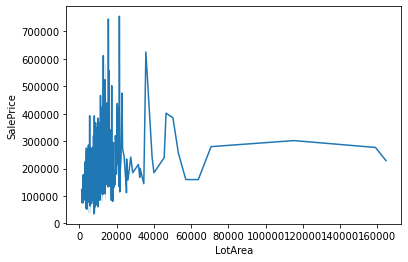

In [74]:
sns.lineplot(x='LotArea',y='SalePrice',data=house)
# lot size in sqf from 300 to 40000 has the highest sale price cause this space commnly required from this place
# 20k -30k has the highest sale

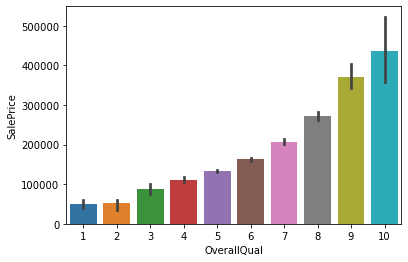

In [78]:
sns.barplot(x='OverallQual',y='SalePrice',data=house)
# sales are high for the the best quality 

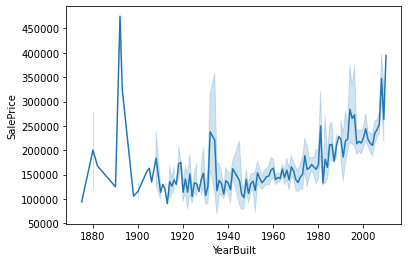

In [80]:
sns.lineplot(x='YearBuilt',y='SalePrice',data=house)
# b/w year 1890 to 1910 there is a huge peak in the price
# the from 1980 to 2000 there is gradual incerease in the sales price

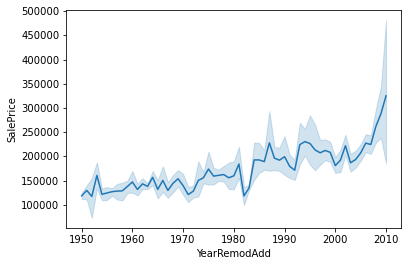

In [81]:
# year  remodelelling is inceraseasing with the year 
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=house)

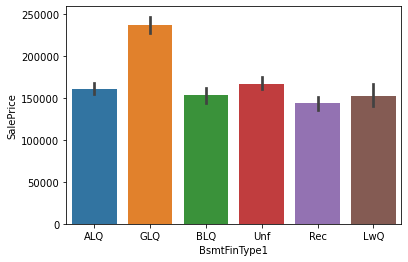

In [83]:
sns.barplot(x='BsmtFinType1',y="SalePrice",data=house)
#Good Living Quarters basment area  has the highest sales 

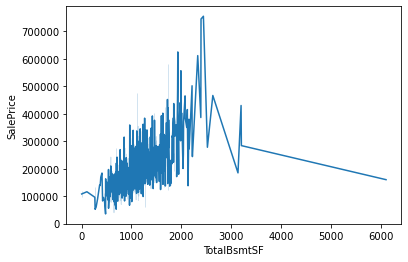

In [85]:
sns.lineplot(x='TotalBsmtSF',y="SalePrice",data=house)
# 2k to 3k basement area sqt has the highest sale price 

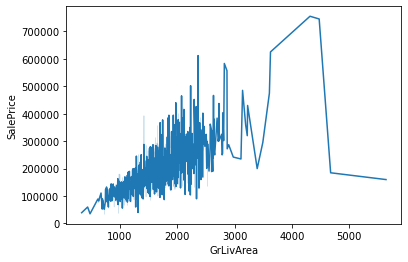

In [87]:
sns.lineplot(x='GrLivArea',y='SalePrice',data=house)
#Above (ground) living area square feet  has sales price is increasing with area


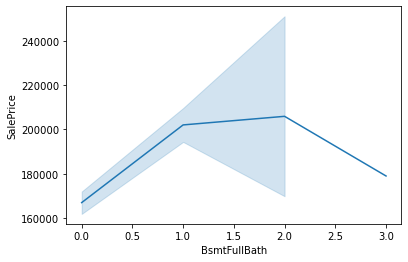

In [88]:
sns.lineplot(x='BsmtFullBath',y='SalePrice',data=house)
#  2 bathroms has the highest sales 

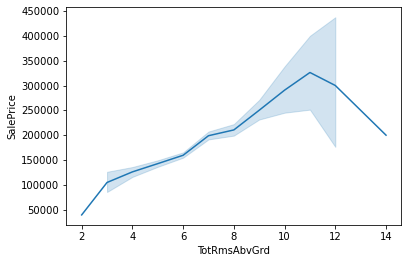

In [89]:
sns.lineplot(x='TotRmsAbvGrd',y="SalePrice",data=house)
# 8 to 12 rooms above ground has the highest sale after that they are decreasing 

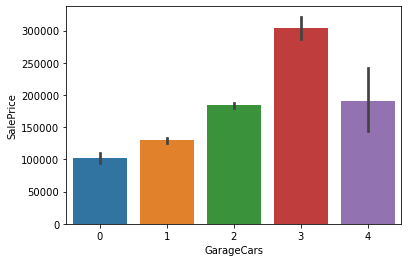

In [90]:
sns.barplot(x='GarageCars',y='SalePrice',data=house)
# 3 space area has the highest sales

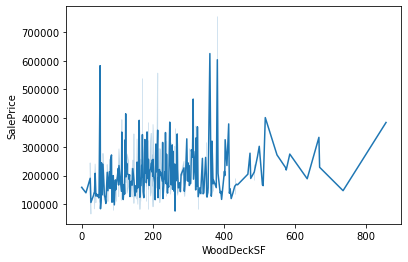

In [92]:
sns.lineplot(x='WoodDeckSF',y='SalePrice',data=house)

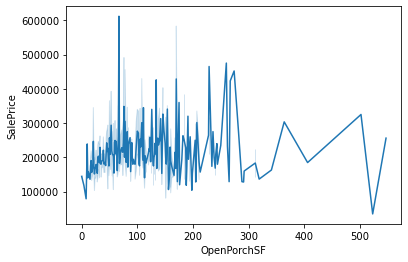

In [93]:
sns.lineplot(x='OpenPorchSF',y='SalePrice',data=house)

# Feature Engineering

In [94]:
# Remove outliers
#converting categorical values 
# then need to scale those values 
# then apply pca for dimension reduction

In [103]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,2,2007,WD,Normal,128000
1,889,20,3,95,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,Shed,0,10,2007,WD,Normal,268000
2,793,60,3,92,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,Shed,0,6,2007,WD,Normal,269790
3,110,20,3,105,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,1,2010,COD,Normal,190000
4,422,20,3,70,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,Shed,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70,9819,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Shed,0,2,2010,WD,Normal,122000
1164,554,20,3,67,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,Shed,0,5,2009,WD,Normal,108000
1165,196,160,3,24,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,Shed,0,7,2009,WD,Normal,148500
1166,31,70,0,50,8500,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,Shed,0,7,2008,WD,Normal,40000


In [98]:
from sklearn import preprocessing            


In [ ]:
# Converting categorical values with label encoder

In [99]:
lb=preprocessing.LabelEncoder()

In [102]:
house['MSZoning']=lb.fit_transform(data['MSZoning'])

In [146]:
# 
name=house.select_dtypes(include=[object])
for col in name.columns:
    print(col)

In [110]:
lis=["Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
     "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond",
     "Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
     "KitchenQual","Functional","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive","MiscFeature",
     "SaleType","SaleCondition"]

In [124]:
house['Street']=lb.fit_transform(data['Street'])


In [125]:
house['LotShape']=lb.fit_transform(data['LotShape'])


In [126]:
house['LandContour']=lb.fit_transform(data['LandContour'])

In [127]:

house['Utilities']=lb.fit_transform(data['Utilities'])
house['LotConfig']=lb.fit_transform(data['LotConfig'])


In [130]:
house['LandSlope']=lb.fit_transform(data['LandSlope'])
house['Neighborhood']=lb.fit_transform(data['Neighborhood'])
house['Condition1']=lb.fit_transform(data['Condition1'])
house['Condition2']=lb.fit_transform(data['Condition2'])
house['BldgType']=lb.fit_transform(data['BldgType'])
house['HouseStyle']=lb.fit_transform(data['HouseStyle'])
house['RoofStyle']=lb.fit_transform(data['RoofStyle'])
house['RoofMatl']=lb.fit_transform(data['RoofMatl'])
house['Exterior1st']=lb.fit_transform(data['Exterior1st'])
house['Exterior2nd']=lb.fit_transform(data['Exterior2nd'])
house['MasVnrType']=lb.fit_transform(data['MasVnrType'])
house['ExterQual']=lb.fit_transform(data['ExterQual'])
house['ExterCond']=lb.fit_transform(data['ExterCond'])
house['Foundation']=lb.fit_transform(data['Foundation'])
house['BsmtQual']=lb.fit_transform(data['BsmtQual'])
house['BsmtCond']=lb.fit_transform(data['BsmtCond'])
house['BsmtExposure']=lb.fit_transform(data['BsmtExposure'])
house['BsmtFinType1']=lb.fit_transform(data['BsmtFinType1'])
house['BsmtFinType2']=lb.fit_transform(data['BsmtFinType2'])
house['Heating']=lb.fit_transform(data['Heating'])
house['HeatingQC']=lb.fit_transform(data['HeatingQC'])
house['CentralAir']=lb.fit_transform(data['CentralAir'])
house['Electrical']=lb.fit_transform(data['Electrical'])
house['KitchenQual']=lb.fit_transform(data['KitchenQual'])
house['Functional']=lb.fit_transform(data['Functional'])
house['GarageType']=lb.fit_transform(data['GarageType'])

house['GarageFinish']=lb.fit_transform(data['GarageFinish'])
house['GarageQual']=lb.fit_transform(data['GarageQual'])
house['GarageCond']=lb.fit_transform(data['GarageCond'])
house['PavedDrive']=lb.fit_transform(data['PavedDrive'])
house['MiscFeature']=lb.fit_transform(data['MiscFeature'])
house['SaleType']=lb.fit_transform(data['SaleType'])
house['SaleCondition']=lb.fit_transform(data['SaleCondition'])


In [144]:
house['LotFrontage']=house['LotFrontage'].astype(float)

In [142]:
house['MasVnrArea']=house['MasVnrArea'].astype(float)


In [145]:
house['GarageYrBlt']=house['GarageYrBlt'].astype(float)

In [147]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.0,4928,1,0,3,0,4,...,0,0,0,2,0,2,2007,8,4,128000
1,889,20,3,95.0,15865,1,0,3,0,4,...,0,0,224,2,0,10,2007,8,4,268000
2,793,60,3,92.0,9920,1,0,3,0,1,...,0,0,0,2,0,6,2007,8,4,269790
3,110,20,3,105.0,11751,1,0,3,0,4,...,0,0,0,2,0,1,2010,0,4,190000
4,422,20,3,70.0,16635,1,0,3,0,2,...,0,0,0,2,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.0,9819,1,0,3,0,4,...,0,0,0,2,0,2,2010,8,4,122000
1164,554,20,3,67.0,8777,1,3,3,0,4,...,0,0,0,2,0,5,2009,8,4,108000
1165,196,160,3,24.0,2280,1,3,3,0,2,...,0,0,0,2,0,7,2009,8,4,148500
1166,31,70,0,50.0,8500,1,3,3,0,4,...,172,0,0,2,0,7,2008,8,4,40000


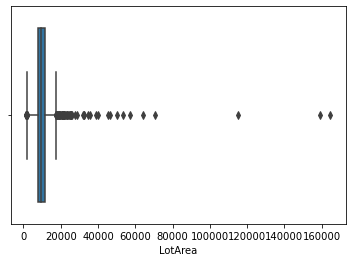

In [148]:
sns.boxplot(x='LotArea',data=house)
# there are outliers present in our data

In [150]:
house.shape

(1168, 76)

In [151]:
# using Principal compenent analaysis to reduce the dimesion 
# we need to scale the whole data 
from sklearn.preprocessing import StandardScaler


In [153]:
sc=StandardScaler()
x_a=sc.fit_transform(house)


In [154]:
x_a

array([[-1.43548658,  1.50830058, -0.02164599, ...,  0.33003329,
         0.20793187, -0.67631017],
       [ 0.39632483, -0.87704243, -0.02164599, ...,  0.33003329,
         0.20793187,  1.09423443],
       [ 0.16554544,  0.07709478, -0.02164599, ...,  0.33003329,
         0.20793187,  1.11687211],
       ...,
       [-1.26961389,  2.46243779, -0.02164599, ...,  0.33003329,
         0.20793187, -0.41705186],
       [-1.66626597,  0.31562908, -4.76211672, ...,  0.33003329,
         0.20793187, -1.78922393],
       [-0.25755011,  0.07709478, -0.02164599, ...,  0.33003329,
         0.20793187,  0.02179027]])

In [155]:
x_y=pd.DataFrame(x_a,columns=house.columns)

In [190]:
fg=x_y.iloc[:,-1:]

In [200]:
fg.shape

(1168, 1)

In [157]:
from sklearn.decomposition import PCA

In [158]:
pca=PCA(n_components=10)


In [159]:
pca.fit(x_y)

PCA(n_components=10)

In [160]:
last=pca.transform(x_y)

In [161]:
last

array([[-0.7668706 , -1.6102226 , -1.82064164, ...,  0.07096818,
         0.61131107,  0.84601587],
       [ 3.26829059,  0.3003324 ,  5.29047114, ...,  0.6146688 ,
         4.4874861 ,  2.67816564],
       [ 2.94941072,  0.03749236,  0.22392824, ...,  0.45197521,
        -1.09096011, -0.77580197],
       ...,
       [-1.08386372, -0.39714632, -1.72507357, ..., -0.37486006,
        -0.07193749,  0.95022834],
       [-6.4372999 ,  3.57681635, -0.06824364, ..., -0.84993096,
        -0.08199643, -1.19637481],
       [ 2.07725828, -0.20881556, -1.82255838, ...,  0.4952603 ,
        -0.84824883, -0.9437889 ]])

In [167]:
dim=pd.DataFrame(data=last)

In [201]:
dim['SalesPRice']=fg

In [202]:
dim

,0,1,2,3,4,5,6,7,8,9,SalesPRice
0,-0.766871,-1.610223,-1.820642,0.306443,1.157543,0.308614,-0.267333,0.070968,0.611311,0.846016,-0.676310
1,3.268291,0.300332,5.290471,-1.138772,-1.120598,-2.404929,-0.002732,0.614669,4.487486,2.678166,1.094234
2,2.949411,0.037492,0.223928,1.962237,-0.393253,-0.563358,-0.064464,0.451975,-1.090960,-0.775802,1.116872
3,2.043708,-0.329292,1.978117,-1.818260,0.800007,3.049091,-1.074137,-0.234437,-0.336750,-0.453522,0.107788
4,1.841976,-1.448958,2.296042,0.202478,0.350876,0.869911,-0.135767,-0.176592,0.141884,1.201869,0.423957
...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.574166,-1.346577,0.300379,0.047387,-0.547541,1.578949,-0.246313,-0.084043,-0.573874,-0.250573,-0.752191
1164,-2.227565,0.066191,-2.298514,-1.735512,-1.201950,-1.025189,0.868354,0.038583,-0.265647,-0.819494,-0.929245
1165,-1.083864,-0.397146,-1.725074,3.834077,1.307680,0.449488,-0.163932,-0.374860,-0.071937,0.950228,-0.417052
1166,-6.437300,3.576816,-0.068244,0.422853,2.904405,-0.750740,-0.026930,-0.849931,-0.081996,-1.196375,-1.789224


In [203]:
from scipy.stats import zscore
z_score=abs(zscore(dim))
print(dim.shape)
data_final=dim.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1168, 11)
(1075, 11)


In [207]:
# outliers are removed from the data 
data_final

,0,1,2,3,4,5,6,7,8,9,SalesPRice
0,-0.766871,-1.610223,-1.820642,0.306443,1.157543,0.308614,-0.267333,0.070968,0.611311,0.846016,-0.676310
2,2.949411,0.037492,0.223928,1.962237,-0.393253,-0.563358,-0.064464,0.451975,-1.090960,-0.775802,1.116872
3,2.043708,-0.329292,1.978117,-1.818260,0.800007,3.049091,-1.074137,-0.234437,-0.336750,-0.453522,0.107788
4,1.841976,-1.448958,2.296042,0.202478,0.350876,0.869911,-0.135767,-0.176592,0.141884,1.201869,0.423957
5,3.485971,1.938990,-2.288433,0.372781,-1.668788,-0.245787,-0.023770,0.938615,0.206415,0.253310,0.477200
...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.574166,-1.346577,0.300379,0.047387,-0.547541,1.578949,-0.246313,-0.084043,-0.573874,-0.250573,-0.752191
1164,-2.227565,0.066191,-2.298514,-1.735512,-1.201950,-1.025189,0.868354,0.038583,-0.265647,-0.819494,-0.929245
1165,-1.083864,-0.397146,-1.725074,3.834077,1.307680,0.449488,-0.163932,-0.374860,-0.071937,0.950228,-0.417052
1166,-6.437300,3.576816,-0.068244,0.422853,2.904405,-0.750740,-0.026930,-0.849931,-0.081996,-1.196375,-1.789224


In [208]:
x=data_final.drop(columns=data_final.iloc[:,-1:],axis=1)

In [209]:
x

,0,1,2,3,4,5,6,7,8,9
0,-0.766871,-1.610223,-1.820642,0.306443,1.157543,0.308614,-0.267333,0.070968,0.611311,0.846016
2,2.949411,0.037492,0.223928,1.962237,-0.393253,-0.563358,-0.064464,0.451975,-1.090960,-0.775802
3,2.043708,-0.329292,1.978117,-1.818260,0.800007,3.049091,-1.074137,-0.234437,-0.336750,-0.453522
4,1.841976,-1.448958,2.296042,0.202478,0.350876,0.869911,-0.135767,-0.176592,0.141884,1.201869
5,3.485971,1.938990,-2.288433,0.372781,-1.668788,-0.245787,-0.023770,0.938615,0.206415,0.253310
...,...,...,...,...,...,...,...,...,...,...
1163,-3.574166,-1.346577,0.300379,0.047387,-0.547541,1.578949,-0.246313,-0.084043,-0.573874,-0.250573
1164,-2.227565,0.066191,-2.298514,-1.735512,-1.201950,-1.025189,0.868354,0.038583,-0.265647,-0.819494
1165,-1.083864,-0.397146,-1.725074,3.834077,1.307680,0.449488,-0.163932,-0.374860,-0.071937,0.950228
1166,-6.437300,3.576816,-0.068244,0.422853,2.904405,-0.750740,-0.026930,-0.849931,-0.081996,-1.196375


In [213]:
y=pd.DataFrame(data_final,columns=['SalesPRice'])

In [217]:
y

,SalesPRice
0,-0.676310
2,1.116872
3,0.107788
4,0.423957
5,0.477200
...,...
1163,-0.752191
1164,-0.929245
1165,-0.417052
1166,-1.789224


In [219]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)



In [220]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def maxr2_score(lg,x,y):
    max_r_score=0
    for r_state in range(0,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        lg.fit(x_train,y_train)
        y_pred=lg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print(" r2 score coressponding o ",r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print("max r2 score coresspondnig to ",final_r_state,'is',max_r_score)
        return final_r_state

In [236]:
# 1st model
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)
r_state=maxr2_score(lg,x,y)
acc=lg.score(x_test,y_test)
print('the accuracy score is' ,acc*100)


 r2 score coressponding o  0 is 0.8857505049547183
max r2 score coresspondnig to  0 is 0.8857505049547183
the accuracy score is 90.24376476303397


In [239]:
#2nd model 
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,50)}
r=KNeighborsRegressor()
gknr=GridSearchCV(r,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,x,y)
acc=knr.score(x_test,y_test)
print('the accuracy score is' ,acc*100)

 r2 score coressponding o  0 is 0.861774088428412
max r2 score coresspondnig to  0 is 0.861774088428412
the accuracy score is 90.83320862809602


In [252]:
from sklearn.model_selection import cross_val_score
print(" Mean r2 score for linear regression is ",cross_val_score(lg,x,y,cv=5,scoring='r2').mean())
print(" Mean r2 score for Kneighbors is ",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print(" Mean r2 score for lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print(" Mean r2 score for Gradient boosting is  ",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())

 Mean r2 score for linear regression is  0.8901156400126847
 Mean r2 score for Kneighbors is  0.8697397867608242
 Mean r2 score for lasso regression is  0.8543302608459118


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

 Mean r2 score for Gradient boosting is   0.8932972563627789


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [246]:
# 3rd model lasso regression 
from sklearn.linear_model import Lasso
lsreg=Lasso
parameters={'alpha':[0.001,0.01,0.1,1]}
clg=GridSearchCV(lsreg,parameters,cv=10)
clg
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)
acc=lsreg.score(x_test,y_test)
print('the accuracy score is' ,acc*100)

 r2 score coressponding o  0 is 0.8454769038426839
max r2 score coresspondnig to  0 is 0.8454769038426839
the accuracy score is 86.56688865074607


In [251]:
# 4th model Gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'Learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,150,200]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)
r_state=maxr2_score(gbr,x,y)
acc=gbr.score(x_test,y_test)
print('the accuracy score is' ,acc*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 r2 score coressponding o  0 is 0.8899901572285908
max r2 score coresspondnig to  0 is 0.8899901572285908
the accuracy score is 94.2927139519029


In [257]:
#5th model ada boost regressor and decision tree regressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1]}
clg=GridSearchCV(ada_reg,parameters,cv=5)
clg.fit(x,y)
clg.best_params_
ada_reg=AdaBoostRegressor(learning_rate=1)
r_state=maxr2_score(ada_reg,x,y)
acc=ada_reg.score(x_test,y_test)
print('the accuracy score is ',acc*100)
print(" Mean r2 score for Ada boosting is  ",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

 r2 score coressponding o  0 is 0.8405428296023547
max r2 score coresspondnig to  0 is 0.8405428296023547
the accuracy score is  88.61631098700651


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

 Mean r2 score for Ada boosting is   0.8510885954007069


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [258]:
# 6th decsion tree model
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)
acc=dtr.score(x_test,y_test)
print('the accuracy score is' ,acc*100)

 r2 score coressponding o  0 is 0.8101070527828124
max r2 score coresspondnig to  0 is 0.8101070527828124
the accuracy score is 97.3652948752598


In [259]:
# out of all the models Gradient boosting is working best with a good cross validation score 
x_train,x_test,y_train,y_test=train_test_split(x,y)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)


In [260]:
gbr

GradientBoostingRegressor(n_estimators=50)

In [261]:
gbr.fit(x_test,y_test)
df=gbr.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [263]:
df
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("r2 score is " ,r2_score(y_test,df))

rmse is  0.12424082320598086
r2 score is  0.977441478438156


In [266]:
import joblib
joblib.dump(gbr,'Houseprice.ipynb')


['Houseprice.ipynb']